In [0]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [0]:
url = 'https://raw.githubusercontent.com/ThaWeatherman/scrapers/master/boardgamegeek/games.csv'
games = pd.read_csv(url)

In [4]:
games.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [5]:
games.shape

(81312, 20)

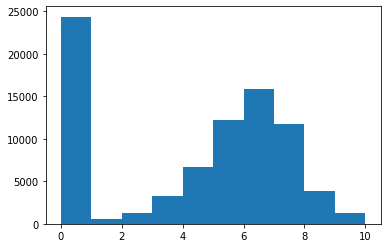

In [6]:
plt.hist(games['average_rating'])
plt.show()

In [7]:
games[games['average_rating']==0].iloc[0]

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object

In [8]:
games[games['average_rating']!=0].iloc[0]

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object

In [0]:
games=games[games['users_rated']>0]

In [0]:
games=games.dropna(axis=0)

In [11]:
games.shape

(56894, 20)

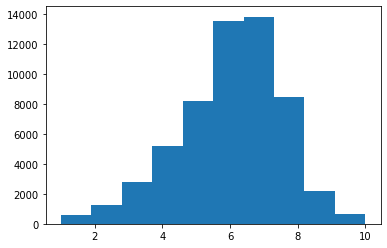

In [13]:
plt.hist(games['average_rating'])
plt.show()

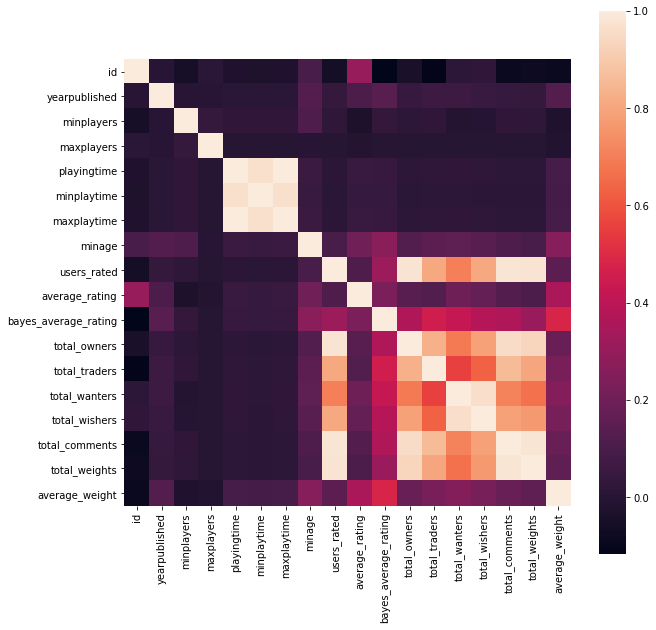

In [22]:
corrmat=games.corr()
fig=plt.figure(figsize=(10,10))
sns.heatmap(corrmat,square=True)
plt.show()

In [0]:
columns=games.columns.tolist()

columns =[c for c in columns if c not in ['bayes_average_rating','id','average_rating','type','name']]

target='average_rating'

In [0]:
train=games.sample(frac=0.8,random_state=1)

In [0]:
#select anything not in the training set and put it in test set
test=games.loc[~games.index.isin(train.index)]

In [28]:
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [32]:
games.index.isin(train.index)

array([ True,  True,  True, ...,  True, False, False])

### Trying the Linear Regression model

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [34]:
lr=LinearRegression()

lr.fit(train[columns],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predictions=lr.predict(test[columns])

In [36]:
mean_squared_error(predictions,test[target])

2.078819032629323

### Trying the Random Forest model

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rfr=RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=1)

rfr.fit(train[columns],train[target])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [0]:
predictions=rfr.predict(test[columns])

In [40]:
mean_squared_error(predictions,test[target])

1.4458560046071653